In [158]:
from random import randint

In [159]:
alumnos = ['Carolina Sánchez',
           'Eliut Rodríguez',
           'Fernando Durán',
           'Issac Vergara',
           'Joaquín Licea',
           'Joaquín Rincón',
           'José Ángel Tovar',
           'Luis Montealegre ',
           'Manuel Díaz',
           'María José Gutiérrez',
           'Martín Wulf',
           'Santiago Sánchez',
           'Valeria Gómez del Campo']

In [160]:
def extract_alumno():
    alumno = alumnos[randint(1, 13) - 1]
    return alumno 

In [162]:
count_alumnos = {} 
for i in range(1000):
    alumno = extract_alumno()
    if alumno in count_alumnos:
        count_alumnos[alumno] += 1
    else:
        count_alumnos[alumno] = 1
count_alumnos

{'Valeria Gómez del Campo': 76,
 'María José Gutiérrez': 83,
 'Issac Vergara': 80,
 'Santiago Sánchez': 72,
 'Fernando Durán': 88,
 'José Ángel Tovar': 87,
 'Martín Wulf': 74,
 'Carolina Sánchez': 77,
 'Joaquín Licea': 63,
 'Luis Montealegre ': 80,
 'Manuel Díaz': 69,
 'Eliut Rodríguez': 66,
 'Joaquín Rincón': 85}

# Tobit

Variables continuas que están acotadas estructuralmente en alguno de sus extremos típicamente son analizadas mediante modelos Tobit, censored regressions o truncated models.

En particular el modelo Tobit es últil para analizar casos donde la variable independiente está acotada en alguno de los extremos con una masa positiva de observaciones concentrada en ese extremo pero sin acotar en el otro.

En el caso del modelo tobit nos interesa ver cómo son afectadas las estimaciones si la variable dependiente tiene una alta concentración en un valor específico y para el resto de los valores hay una distribución relativamente continua.

Por ejemplo la compra de alcohol en un mes

La concentración de valores para la variable dependiente puede llevarnos a un sesgo si queremos estimar el efecto de un cambio marginal en $x_{j}$ para los valores de la variable dependiente donde existe una distribución continua (es decir, omitiendo $y \mid y=0$, como en el ejemplo de arriba a los que no consumen alcohol).

En este sentido, supongamos que tenemos una v.a. $y$ continua para valores estrictamente positivos$^{1}$, pero $P(y=0) > 0$-

En prinicipio podemos usar un modelo OLS lineal para atender una distribución como la que está descrita arriba. De hecho, un modelo lineal puede ser una buena aproximación para $E(y|x_{1}, x_{2}, ..., x_{k})$ para las $x_{j}$ que están cercanas a la media. Sin embargo, es posible obtener predictores ($\hat{y}$) negativos para $y$ (¡recuerda por qué desechamos el modelo LPM!). 

Por otro lado, la interpretación asociada a los modelos lineales según la cual $\beta_{j}$ representa el efecto parcial de $x_{j}$ sobre $y$ puede ser incorrecto en este caso.

En ocasiones es importante tener un modelo que estructuralmente impida predictores $\hat{y}$ negativos permitiendo a la vez efectos parciales para conjuntos "amplios" en el dominio de las variables explicativas $X \in {\Bbb R}^{k}$

$$y^{*} = \beta_{0} + X\beta + u$$

$$u \sim N(0, \sigma^2) \hspace{50pt} (h1)$$

$$y = max(0, y^{*})$$

El supuesto $(h1)$ en los errores nos permite asegurar que la probabilidad condicional de $y$ dado $X$ es la misma que $y^{*}$ dado $X$ para $X \geq 0$

$$P(y=0 \mid X) = P(y^{*} <0 \mid X) = P(u<-X\beta \mid X)$$

$$P(u<-X\beta \mid X) = P(\frac{u}{\sigma}<\frac{-X\beta}{\sigma} \mid X)$$

$$\Phi(\frac{-X\beta}{\sigma}) = 1 - \Phi(\frac{X\beta}{\sigma}) \hspace{50pt} \beta = [\beta_{0}, \beta_{1}, ..., \beta_{k}]$$

La versión muestral:

$$P(y_{i}=0 \mid X_{i}) = 1 - \Phi(\frac{X_{i}\beta}{\sigma})$$

$$\ell(\beta, \sigma) \hspace{50pt} PowerPoint$$ 

$$\max_{\beta,\, \sigma} \sum\limits_{i=1}^{n}\ell(\beta, \sigma)$$

La solución al problema de optimización requere métodos numéricos de manera que típicamente utilizamos paquetes computacionales.

Es común que los estimadores para $\beta$ de un modelo Tobit se parezcan a los de una regresión lineal simple. El error común es ineterpretarlos como si fueran el resultado del mismo proceso, concretamente como si representaran los efectos parciales de $x_{j}$ sobre $y$

NOrmalmente queremos explicar $y$, no $y*$
___________
$^{1}$/ Sin pérdida de generalidad asumimos que la distribución de $y$ está concentrada en 0.

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [140]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def download_data_from_mongoatlas(database, table, query={}):
    username, password = 'entropy_scholar', 'OCN4kEzbsW5lqQ2W'
    url = 'mongodb+srv://{}:{}@entropy-sfneo.mongodb.net/test?retryWrites=true&w=majority'.format(username, password)
    client = MongoClient(url)
    db = client[database]
    collection = db[table]
    df = pd.DataFrame(list(collection.find(query))).drop('_id', axis=1)
    try:
        df = df.sort_values(['date','clave_mun'], ascending=True)
    except:
        df = df.sort_values(['date'], ascending=True)
    return df

In [61]:
modalidades_agregados = {'homicidio_doloso': ['1HDF', '1HDB', '1HDE', '1HDN'],
                        'extorsion': ['4EEE'],
                        'feminicidio': ['1FFF', '1FFB', '1FFE', '1FFN'],
                        'secuestro': ['2SSE', '2SSC', '2SSD', '2SSX', '2SSO'],
                        'robo_maquinaria': ['4RMA', '4RMB', '4RMC', '4RMD', '4RMF', '4RME'],
                        'robo_negocio': ['4RNC', '4RNS'],
                        'robo_bancos': ['4RBC', '4RBS'],
                        'robo_transportistas': ['4RPC', '4RPS'],
                        'robo_vehiculos': ['4RVA', '4RVB', '4RVM', '4RVN', '4RVE', '4RVF', '4RAC', '4RAS'],
                        'robo_casa': ['4RHC', '4RHS']}

modalidades_nombres = {'homicidio_doloso': 'Homicidio Doloso',
                       'extorsion': 'Extorsión',
                       'feminicidio': 'Feminicidios',
                       'secuestro': 'Secuestro',
                       'robo_maquinaria': 'Robo Maquinaria',
                       'robo_negocio': 'Robo Negocios',
                       'robo_bancos': 'Robo Bancos',
                       'robo_transportistas': 'Robo Transportistas',
                       'robo_vehiculos': 'Robo Vehículos',
                       'robo_casa': 'Robo Casa'}

In [13]:
def extract_df_between_dates(df, start_date, end_date):
    df_fechas = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]
    df_fechas = df_fechas.sort_values(['date', 'clave_mun'], ascending=True)
    df_fechas = df_fechas.reset_index(drop=True)    
    return df_fechas

In [114]:
def extract_df_modalidad(df, modalidad):
    df_modalidad = df[['clave_mun'] + modalidades_agregados[modalidad]]
    df_modalidad[modalidad] = [0] * len(df_modalidad)
    for m_code in modalidades_agregados[modalidad]:
        df_modalidad[modalidad] += df_modalidad[m_code]
    df_modalidad = df_modalidad.drop(modalidades_agregados[modalidad], axis=1)
    return df_modalidad

In [125]:
def extract_mpos_poblacion(df, date):
    df_date = df.loc[df['date'] == date]
    df_date = df_date[['clave_mun', 'pob']]
    df_date = df_date.reset_index(drop=True)
    return df_date

In [134]:
def create_tasa_100mil(df, column):
    tasas = []
    for i in range(len(df)):
        v = df[column][i]
        p = df['pob'][i]
        v_tasa = v / (p / 100000)
        tasas.append(v_tasa)
    df[column + '_tasa'] = tasas
    return df

In [4]:
snsp_mpos = download_data_from_mongoatlas('sesnsp', 'municipal_carpetas')

In [173]:
start_date = '2015/02'
end_date = '2020/02'
snsp_mpos_dates = extract_df_between_dates(snsp_mpos, start_date, end_date)

In [174]:
snsp_mpos_agg = snsp_mpos_dates.groupby(['clave_mun']).sum()
snsp_mpos_agg = snsp_mpos_agg.drop(['pob', 'año', 'mes'], axis=1)
snsp_mpos_agg = snsp_mpos_agg.reset_index()

In [175]:
snsp_mpos_agg_homicidio = extract_df_modalidad(snsp_mpos_agg, 'homicidio_doloso')

In [176]:
mpos_poblacion = extract_mpos_poblacion(snsp_mpos, '2020/02')

In [177]:
snsp_mpos_agg_homicidio = snsp_mpos_agg_homicidio.merge(mpos_poblacion,
                                                          on='clave_mun')

In [178]:
snsp_mpos_agg_homicidio = create_tasa_100mil(snsp_mpos_agg_homicidio, 'homicidio_doloso')

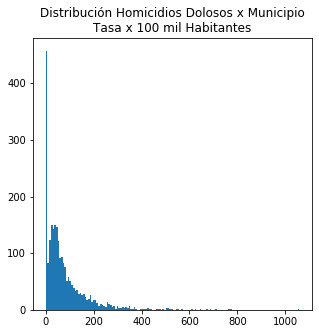

In [182]:
fig = plt.figure(figsize=(5, 5))
plt.title('Distribución Homicidios Dolosos x Municipio\nTasa x 100 mil Habitantes')
plt.hist(snsp_mpos_agg_homicidio['homicidio_doloso_tasa'], bins=150)
plt.show()

### Discusión: Qué variables pueden alimentar a X
y = F(X)

# Qué sigue:
# Tobit

# 1) Inferencia
### t statistics
### Wald test

# 2) Panel
i's Municipios (cross sectional)
t's los meses (time series)

***Efectos fijos

# Mini Examen

Objetivo:
- Presentar un buen proyecto de investigación

Se calificará:
- Originalidad del modelo
- Consistencia y relevancia de la pregunta
- Factibilidad
- En genaral: uso del conocimiento en econometría II 

Entregable:
- ipynb
- uso $\LaTeX $